In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [324]:
data = pd.read_csv("/Users/isa/Desktop/SpamEmail/spam_ham_dataset.csv", header=0)

In [325]:
data.head()
data_cp = data.copy()

In [326]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [327]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

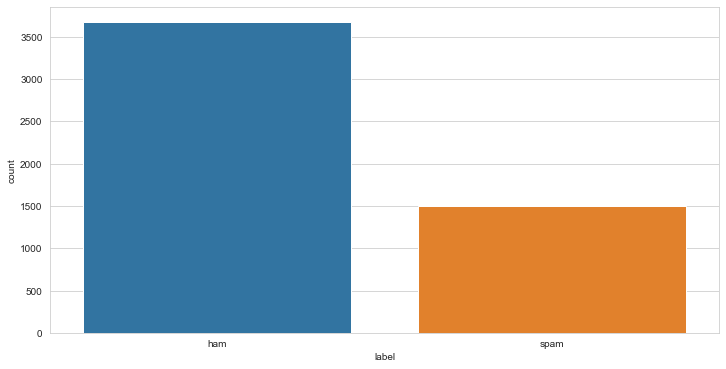

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize = (12, 6))
sns.countplot(data = data, x = 'label');

In [329]:
data_cp["label"]=data_cp["label"].map({'spam':1,'ham':0})

In [330]:
data_cp['label'].head()

0    0
1    0
2    0
3    1
4    0
Name: label, dtype: int64

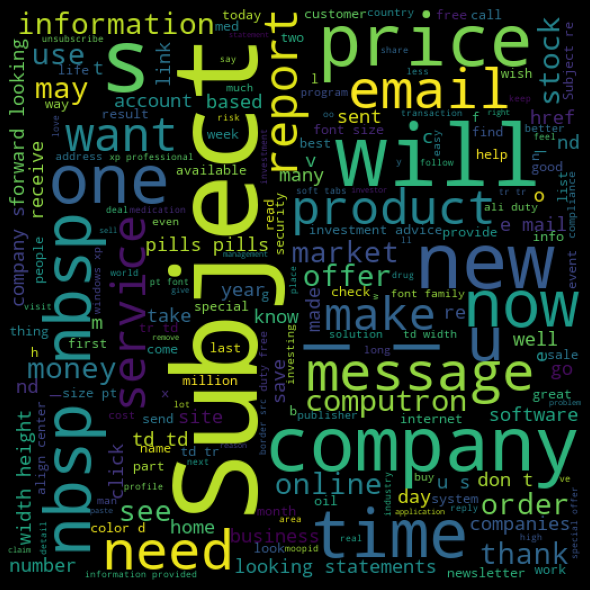

In [331]:
#spam maillerde en çok geçen kelimeler wordcloud ile görselleştirildi.
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
spam_words=' '.join(list(data_cp[data_cp['label']==1]['text'])) 
spam_wc=WordCloud(width=512,height=512).generate(spam_words) 
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

In [332]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
data['text'][0]

Before cleaning:


"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [333]:
print('After cleaning:')
clean_str(data['text'][0])

After cleaning:


'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [334]:
# text_clean adında yeni bir sütun oluşturuldu
data['text_clean'] = data['text'].apply(lambda string: clean_str(string))

# yeni data frame'i göster
data.head()

,Unnamed: 0,label,text,label_num,text_clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached file ...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...


In [335]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data.text_clean)

y = data.label

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [337]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 2.62 sec
MultinomialNB        trained in 0.01 sec
Logistic Regr.       trained in 0.66 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 0.41 sec
SVM (Linear)         trained in 0.09 sec
SVM (RBF)            trained in 2.14 sec


In [338]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])

In [339]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Logistic Regr.,0.980670,0.66
1,MultinomialNB,0.976160,0.01
2,Random Forest,0.971005,2.62
3,SVM (Linear),0.971005,0.09
4,SVM (RBF),0.967139,2.14
5,Decision Tree,0.947809,0.41
6,KNN,0.857603,0.00


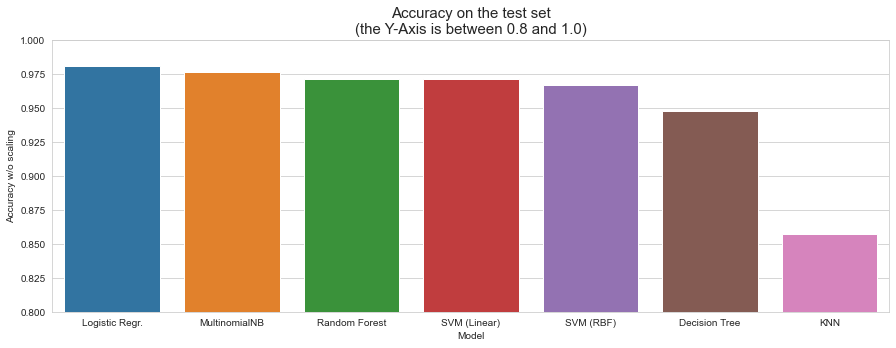

In [340]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

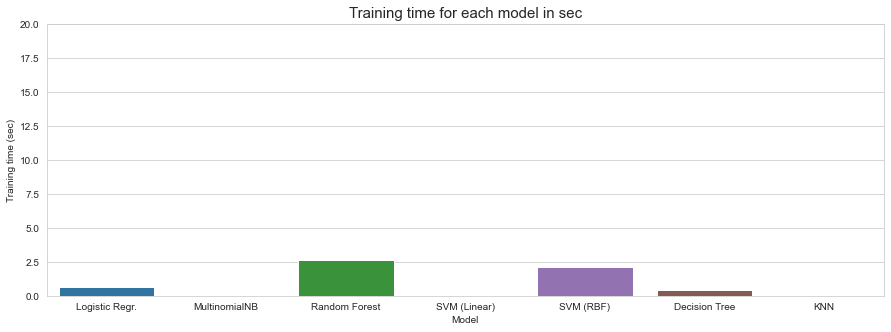

In [341]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,20)
plt.show()

In [342]:
linear_svc = Pipeline([('vectorizer', CountVectorizer()), ('classifier', LinearSVC())])

In [352]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=6)
scores = []
confusion = np.array([[0, 0], [0, 0]])
for train_indices, test_indices in k_fold.split(data):
    train_text = data.iloc[train_indices]['text'].values
    train_y = data.iloc[train_indices]['label'].values

    test_text = data.iloc[test_indices]['text'].values
    test_y = data.iloc[test_indices]['label'].values

    linear_svc.fit(train_text, train_y)
    predictions = linear_svc.predict(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label='spam')
    scores.append(score)

print('Total emails classified:', len(data))
print('Score:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)

Total emails classified: 5171
Score: 0.9473326820760332
Confusion matrix:
[[3577   95]
 [  65 1434]]


In [344]:
#y_test = y_test.map({'spam': 1, 'ham': 0})
#y_test.head()

In [361]:
data = data.drop('Unnamed: 0', axis=1)

data["label"]=data["label"].map({'spam':1,'ham':0})

In [362]:
data_cp['label'].head()

0    0
1    0
2    0
3    1
4    0
Name: label, dtype: int64

In [369]:
X = data['text']
y = data['label_num']

In [370]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

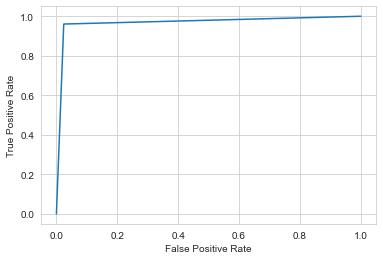

In [372]:
from sklearn import metrics
import matplotlib.pyplot as plt
linear_svc.fit(x_train, y_train)


fpr, tpr, _ = metrics.roc_curve(y_test,  linear_svc.predict(x_test))

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()